## Look at Nfix temperature respons functions from: 
Bytnerowicz et al 2022 
       vs. 
Houlton et al 2008


In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
def Bytnerowicz_noAcc(Tmin_fix, Tmax_fix,Topt_fix,tc_soisno):
    Nfix = (((Tmax_fix-tc_soisno)/(Tmax_fix-Topt_fix))* \
             (((tc_soisno-Tmin_fix)/(Topt_fix-Tmin_fix)))** \
             ((Topt_fix- Tmin_fix)/(Tmax_fix-Topt_fix)) )
    return(Nfix)

def Houlton(a_fix, b_fix,C_fix,tc_soisno):
    Nfix = (1.25 ** (a_fix + b_fix * tc_soisno * (1. - 0.5 * tc_soisno / c_fix)) )
    return(Nfix)

In [3]:
## function for temperate systesms
Tmin = -2.04
Topt = 32.10
Tmax = 43.98
tsoi = range(-10,50)
temp = np.full(len(tsoi), np.nan)
for i in range(len(tsoi)):
    if tsoi[i] > Tmin and tsoi[i] < Tmax:
        temp[i] = Bytnerowicz_noAcc(Tmin,Tmax,Topt,tsoi[i])
    else:
        temp[i] = 0.

In [4]:
## function for temperate systesms
Tmin = 7.04
Topt = 33.22
Tmax = 45.35
trop = np.full(len(tsoi), np.nan)
for i in range(len(tsoi)):
    if tsoi[i] > Tmin and tsoi[i] < Tmax:
        trop[i] = Bytnerowicz_noAcc(Tmin,Tmax,Topt,tsoi[i])
    else:
        trop[i] = 0.

In [5]:
a_fix =-3.61999988555908
b_fix = 0.270000010728836 
c_fix = 25.1499996185303
houl = np.full(len(tsoi), np.nan)
for i in range(len(tsoi)):
    houl[i] = Houlton(a_fix,b_fix,c_fix,tsoi[i])

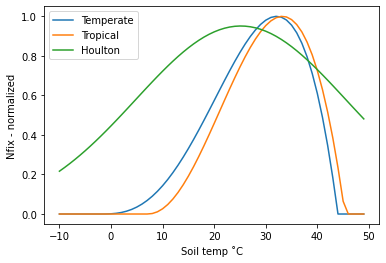

In [6]:
plt.plot(tsoi,temp, label='Temperate')
plt.plot(tsoi,trop, label='Tropical') 
plt.plot(tsoi,houl, label='Houlton') 
plt.xlabel('Soil temp ˚C')
plt.ylabel('Nfix - normalized')
plt.legend() ;

#### Costs are then inverted in FUN, setting min N:C = 6 

In [8]:
s_fix = -6
cost_temp = (-1*s_fix)/np.where(temp>0,temp,np.nan)
cost_trop = (-1*s_fix)/np.where(trop>0,trop,np.nan)
cost_houl = (-1*s_fix)/np.where(houl>0,houl,np.nan)

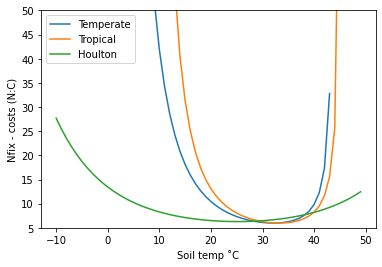

In [9]:
plt.plot(tsoi,cost_temp, label='Temperate')
plt.plot(tsoi,cost_trop, label='Tropical') 
plt.plot(tsoi,cost_houl, label='Houlton') 
plt.xlabel('Soil temp ˚C')
plt.ylabel('Nfix - costs (N:C)')
plt.ylim(5,50)
plt.legend() ;